<a href="https://colab.research.google.com/github/YasudaKaito/pytorch_book_akaishi/blob/main/ch03_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 勾配降下法

- 山登りの比喩
  - 山の高度(計)=損失
  - 山の南北、東西のそれぞれの勾配=損失の勾配
  - 位置の移動=パラメータ修正


# 3.5 ~

In [2]:
import numpy as np

In [3]:
# 身長と体重
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

In [4]:
x = sampleData1[:, 0]
y = sampleData1[:, 1]

In [5]:
# 勾配降下法では対象となる数値は絶対値が1以下である小さな値のほうが望ましい
# 平均を引くことでやりやすくする
X = x - x.mean()
Y = y - y.mean()

In [6]:
import matplotlib.pyplot as plt

In [7]:
import torch

In [8]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [9]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [10]:
def pred(X):
    return W * X + B

In [11]:
Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


In [13]:
!pip install torchviz

  Using cached torchviz-0.0.2.tar.gz (4.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.4 MB/s eta 0:0

In [14]:
# 損失はMSE
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

In [15]:
loss = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


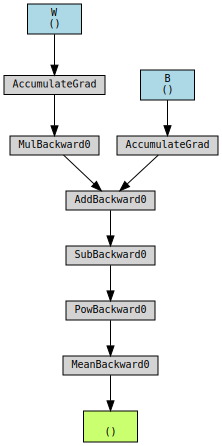

In [16]:
from torchviz import make_dot
params = {"W": W, "B": B}
g = make_dot(loss, params=params)
display(g)

In [17]:
# 勾配計算
loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [18]:
# 1回のパラメタ更新
# 学習率
lr = 0.001
# 勾配計算をしている最中の変数は勝手に値を修正できないので、 no_grad コンテキストでラップする
with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    # 勾配を蓄積する必要はないため、リセット
    W.grad.zero_()
    B.grad.zero_()

In [19]:
# 繰り返し更新
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
# 繰り返し回数
num_epochs = 500
# 学習率
lr = 0.001
# 記録用
history = np.zeros((0, 2))

In [20]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad
        # 勾配を蓄積する必要はないため、リセット
        W.grad.zero_()
        B.grad.zero_()

    # 損失の記録
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss={loss:.4f}")

epoch = 0 loss=13.3520
epoch = 10 loss=10.3855
epoch = 20 loss=8.5173
epoch = 30 loss=7.3364
epoch = 40 loss=6.5858
epoch = 50 loss=6.1047
epoch = 60 loss=5.7927
epoch = 70 loss=5.5868
epoch = 80 loss=5.4476
epoch = 90 loss=5.3507
epoch = 100 loss=5.2805
epoch = 110 loss=5.2275
epoch = 120 loss=5.1855
epoch = 130 loss=5.1507
epoch = 140 loss=5.1208
epoch = 150 loss=5.0943
epoch = 160 loss=5.0703
epoch = 170 loss=5.0480
epoch = 180 loss=5.0271
epoch = 190 loss=5.0074
epoch = 200 loss=4.9887
epoch = 210 loss=4.9708
epoch = 220 loss=4.9537
epoch = 230 loss=4.9373
epoch = 240 loss=4.9217
epoch = 250 loss=4.9066
epoch = 260 loss=4.8922
epoch = 270 loss=4.8783
epoch = 280 loss=4.8650
epoch = 290 loss=4.8522
epoch = 300 loss=4.8399
epoch = 310 loss=4.8281
epoch = 320 loss=4.8167
epoch = 330 loss=4.8058
epoch = 340 loss=4.7953
epoch = 350 loss=4.7853
epoch = 360 loss=4.7756
epoch = 370 loss=4.7663
epoch = 380 loss=4.7574
epoch = 390 loss=4.7488
epoch = 400 loss=4.7406
epoch = 410 loss=4.7327
e

In [21]:
# パラメタの最終更新結果
print("W = ", W.data.numpy())
print("B = ", B.data.numpy())

W =  1.820683
B =  0.3675114


# 3.12 最適化関数の利用

In [22]:
# 繰り返し更新
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
# 繰り返し回数
num_epochs = 500
# 学習率
lr = 0.001
# optimizerとしてSGDを利用
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)
# 記録用
history = np.zeros((0, 2))

In [23]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # 損失の記録
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss={loss:.4f}")

epoch = 0 loss=13.3520
epoch = 10 loss=10.3855
epoch = 20 loss=8.5173
epoch = 30 loss=7.3364
epoch = 40 loss=6.5858
epoch = 50 loss=6.1047
epoch = 60 loss=5.7927
epoch = 70 loss=5.5868
epoch = 80 loss=5.4476
epoch = 90 loss=5.3507
epoch = 100 loss=5.2805
epoch = 110 loss=5.2275
epoch = 120 loss=5.1855
epoch = 130 loss=5.1507
epoch = 140 loss=5.1208
epoch = 150 loss=5.0943
epoch = 160 loss=5.0703
epoch = 170 loss=5.0480
epoch = 180 loss=5.0271
epoch = 190 loss=5.0074
epoch = 200 loss=4.9887
epoch = 210 loss=4.9708
epoch = 220 loss=4.9537
epoch = 230 loss=4.9373
epoch = 240 loss=4.9217
epoch = 250 loss=4.9066
epoch = 260 loss=4.8922
epoch = 270 loss=4.8783
epoch = 280 loss=4.8650
epoch = 290 loss=4.8522
epoch = 300 loss=4.8399
epoch = 310 loss=4.8281
epoch = 320 loss=4.8167
epoch = 330 loss=4.8058
epoch = 340 loss=4.7953
epoch = 350 loss=4.7853
epoch = 360 loss=4.7756
epoch = 370 loss=4.7663
epoch = 380 loss=4.7574
epoch = 390 loss=4.7488
epoch = 400 loss=4.7406
epoch = 410 loss=4.7327
e

In [24]:
# パラメタの最終更新結果
print("W = ", W.data.numpy())
print("B = ", B.data.numpy())

W =  1.820683
B =  0.3675114


In [25]:
# 最適化関数をチューニング
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
# 繰り返し回数
num_epochs = 500
# 学習率
lr = 0.001
# optimizerとしてSGDを利用(モメンタム)
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)
# 記録用
history = np.zeros((0, 2))

In [26]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # 損失の記録
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss={loss:.4f}")

epoch = 0 loss=13.3520
epoch = 10 loss=5.7585
epoch = 20 loss=5.9541
epoch = 30 loss=5.0276
epoch = 40 loss=4.8578
epoch = 50 loss=4.7052
epoch = 60 loss=4.6327
epoch = 70 loss=4.5940
epoch = 80 loss=4.5698
epoch = 90 loss=4.5574
epoch = 100 loss=4.5495
epoch = 110 loss=4.5452
epoch = 120 loss=4.5426
epoch = 130 loss=4.5411
epoch = 140 loss=4.5403
epoch = 150 loss=4.5398
epoch = 160 loss=4.5395
epoch = 170 loss=4.5393
epoch = 180 loss=4.5392
epoch = 190 loss=4.5391
epoch = 200 loss=4.5391
epoch = 210 loss=4.5391
epoch = 220 loss=4.5391
epoch = 230 loss=4.5390
epoch = 240 loss=4.5390
epoch = 250 loss=4.5390
epoch = 260 loss=4.5390
epoch = 270 loss=4.5390
epoch = 280 loss=4.5390
epoch = 290 loss=4.5390
epoch = 300 loss=4.5390
epoch = 310 loss=4.5390
epoch = 320 loss=4.5390
epoch = 330 loss=4.5390
epoch = 340 loss=4.5390
epoch = 350 loss=4.5390
epoch = 360 loss=4.5390
epoch = 370 loss=4.5390
epoch = 380 loss=4.5390
epoch = 390 loss=4.5390
epoch = 400 loss=4.5390
epoch = 410 loss=4.5390
ep

In [27]:
# パラメタの最終更新結果
print("W = ", W.data.numpy())
print("B = ", B.data.numpy())

W =  1.8206898
B =  2.2734291e-06
